In [4]:
import sys
p = '/home/bram/ANTS/entropy'
import numpy as np
sys.path.append(p)
from core.plugins.helper_functions import bivariate_normal
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(bivariate_normal.__doc__)




    X (meshgrid),Y (meshgrid), sigmax (scalar), sigmay (scalar), mux (scalar),
    muy (scalar) , sigmaxy(scalar)
    FROM https://github.com/matplotlib/matplotlib/blob/81e8154dbba54ac1607b21b22984cabf7a6598fa/lib/matplotlib/mlab.py#L1866
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    


In [5]:
def surf(Z, colormap, X,Y, C=None, shade=None):
    scalarMap = cm.ScalarMappable(norm=Normalize(vmin=Z.min(), vmax=Z.max()), cmap=colormap)

    # outputs an array where each Z value is replaced with a corresponding color value
    C_colored = scalarMap.to_rgba(Z)
    fig = plt.figure()
    ax = Axes3D(fig) #<-- Note the difference from your original code...
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=C_colored, shade=shade)

    return surf

(20, 20)


<IPython.core.display.Javascript object>


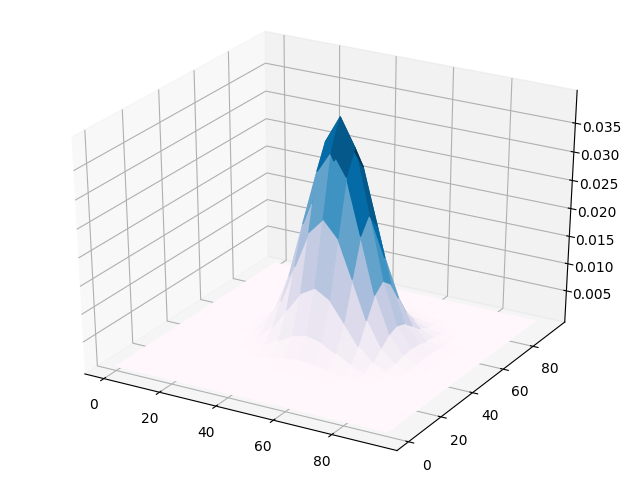

In [36]:
%matplotlib notebook
step= 5
center = (50,50)
stride = int(max(1,np.ceil(1/step)))
X,Y = np.meshgrid(np.arange(0,center[0]*2,step),np.arange(0,center[1]*2,step))
Z = step**2*bivariate_normal(X,Y,sigmax = 10, sigmay=10, mux=50,muy=50)
print(Z[::stride,::stride].shape)
surf(Z[::stride,::stride],colormap = 'PuBu',X=X[::stride,::stride],Y=Y[::stride,::stride])

In [45]:
# volume analysis
print(Z.sum())
the_one = np.ones(Z.shape)
the_pike = np.ones(Z.shape)
the_pike[np.dot(center,1/step).astype(np.int64)] = 1e9



0.9999982851815762


In [46]:
def entropy(Z,):
    """ Calculate the shannon entropy of the whole map """
    T=Z.sum()
    M=Z[Z>0.0]
#     M = Z
    return -np.multiply(M/T,np.log(M/T)).sum() # return sum(M/T * log(M/T))

In [47]:
print(entropy(Z))
print(entropy(the_one/the_one.sum()))
print(entropy(the_pike/the_pike.sum()))
print((the_pike/the_pike.sum()).min())

4.224148497782101
5.991464547107983
2.9957326862960345
4.999999905000002e-11
